<div style='text-align: center;'>
<img src="images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Class - Week 5
## Dr P. V. Johnson
## Department of Mathematics

# This Week

- Demo 5.1 European Call Option
- Demo 5.2 Analysing Errors
- Demo 5.3 Analysing Efficiency

## Law of Large Numbers

If we have a sequence of $N$ independent, identically distributed random variables $Y^i$, then we have that
$$
E[Y] = \lim_{N\to\infty} \frac{1}{N} \sum_{i=1}^N Y^i
$$
which is the law of large numbers. In other words the expectation is exactly like taking a long
run average (as we’d expect), so we can approximate the expectation 
$$
E[Y] \approx \frac{1}{N} \sum_{i=1}^N Y^i 
$$
for some finite $N$. If we call our approximation with $N$ simulations 
$$
V_N = \frac{1}{N} \sum_{i=1}^N Y^i,
$$ 
then note that $V_N$ is itself a random variable. So to generate any desired accuracy $\epsilon$, we can simply increase the value of $N$ until we almost surely have
$$
\text{Pr}\left(| V_N - E[Y] | < \epsilon \right) \to 1
$$
When applying the Monte Carlo technique in finance we are typically trying to obtain the value of $E[f(Y)]$
which is the expectation of a function of a random variable $Y$.

## Application to Options

We can't talk about using Monte-Carlo to price options without first talking about the risk-neutral measure.
If we consider $S_t$ as the value of a share price at time $t$, then the option value at expiry, $t = T$
we can think of as $V(S_T , T )$, and from the fundamental theorem of finance we know that
$$
V(S_t , t) = E_t^Q \bigg[e^{-\int_t^T r(s)ds} V (S_T , T )\bigg],
$$
or if interest rates are constant
$$
V(S_t , t) = e^{-r(T −t)} E_t^Q \bigg[V (S_T , T )\bigg],
$$
where $Q$ is the risk-neutral measure and $E_t$ denotes taking the expectation at
time $t$. Thus if we can estimate the expectation on the right hand side then we can simply
discount this value at the risk-free rate to obtain the option price today. In fact, with Monte-Carlo
methods it is also fairly straightforward to factor in stochastic interest rates as well.

Under the risk neutral measure, the standard GBM model for asset prices is written as an SDE
$$
dS_t = (r-q)S_t dt + \sigma S_t dW_t
$$
where $r$ is the risk free rate, $q$ is the dividend yield, $\sigma$ the volatility and $W_t$ a Wiener process. The objective now is to calculate the value of $S_T$ at time $T$ given some value of $S_0$ at time $t$. 
If you divide the time $t=0$ to $t=T$ into $K$ equally spaced steps, you could approximate a path followed by the asset using the relation
$$
S(t_k+\Delta t) = (r-q)S(t_k) dt + \sigma S(t_k) \sqrt{\Delta t} \phi_k
$$
where $\phi_k\sim N(0,1)$, $\Delta t = T/K$ and $t_k=k\Delta t$. This is an adapted Euler scheme, and generates ok results but is highly inefficient.

Instead, as you may have already seen, we can make use of Ito's lemma to solve the SDE analitically, resulting in the relationship
$$
\ln S_T -\ln S_0 \sim N\bigg(\left(r-q-\frac12\sigma^2\right)T,\sigma^2 T\bigg)
$$
for the asset price at time $T$. This leads to a way to generate random value of $S_T$ without requiring us to calculate the path inbetween:
$$
S_T = S_0 \exp\left(\left(r-q-\frac12\sigma^2\right)T + \sigma \sqrt{T} \phi\right)
$$
where $\phi\sim N(0,1)$ is an iid random number from a normal distribution.

So to calculate an option price, we can write an algorithm of the form
$$
V_N = e^{-r(T −t)}\frac{1}{N} \sum_{i=1}^N V( (S_T)^i , T ),
$$
where
$$
(S_T)^i = S_0 \exp\left(\left(r-q-\frac12\sigma^2\right)T + \sigma \sqrt{T} \phi^i\right)
$$
and $\phi^i$ is a randomly simulated value from the standard normal distribution. Note as an alternative, you can just use the `lognormal` distribution from the generator.

# Demo 5.1: European Call Option

# Tasks

- Write code to generate Monte Carlo approximations to a European call option with parameters $S_0=94.68$, $T=1$, $X=100$, $r=0.05$, $q=0.02$ and $\sigma=0.4$.

Here we know the terminal condition is given by:
$$
V(S,T) = \max(S-X,0)
$$
so our psuedo algorithm will end up looking something like this:
~~~
phi = rng.normal(size=(N))
sum=0.0
for i in range(0,N)
    ST = S0 * exp( (r-q-0.5*sigma*sigma)*T + sigma*sqrt(T)*phi[i])
    VT = max(ST - X,0.0)
    sum = sum + VT
value = (sum/N) * exp(-r*T)
~~~
First import the random number library.

In [1]:
import numpy
rng = numpy.random.default_rng(seed=0) # create a random number generator and reset the starting value

Setup the parameter/variables:

In [2]:
S_0=94.68
T=1
X=100
r=0.05
q=0.02
sigma=0.4

Now generate some stock prices at time $t=T$ using the log normal distribution

In [3]:
N = 1000
ST = rng.lognormal(numpy.log(S_0) + (r-q-0.5*sigma*sigma)*T, sigma*numpy.sqrt(T), N)

Check that the output look sensible:

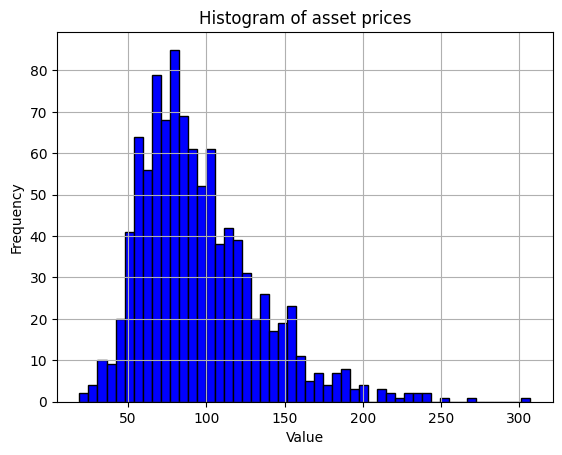

In [4]:
import matplotlib.pyplot as plt
plt.hist(ST, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of asset prices')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Now put this in a Monte Carlo algorithm to get

In [6]:
sum = 0.0
for i in range(0,N):
    sum += max(ST[i]-X,0.0)
value = sum/N *numpy.exp(-r*T)
print(" Call Option value:=",value)

 Call Option value:= 12.266180166032798


# Tasks

- code up the Monte Carlo solver into a function
- run the function several times with the same value of $N$, what do the results look like?
- run the function for different values of $N=1000,2000,...$ and plot out the results, are they what you expected? Can you identify features of the graph?